### AIDS dataset

##### libraries

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

##### import the csv

In [91]:
df =pd.read_csv("aids.csv")
df = df.drop(columns=['homo','race'])
df.head()

time  trt  age      wtkg  hemo  drugs  karnof  oprior  z30  preanti  ...  \
0  1108    1   37  88.11364     0      1     100       0    1      169  ...   
1  1079    0   43  66.77075     0      0     100       0    1      654  ...   
2   492    1   34  82.91725     0      0      90       0    1      710  ...   
3  1191    1   41  98.91817     0      0      81       0    1      992  ...   
4  1141    3   47  53.61717     0      0     100       0    0        0  ...   

   str2  strat  symptom  treat  offtrt  cd40  cd420  cd80  cd820  infected  
0     1      1        0      0       0   389    320   734    737         1  
1     0      2        0      1       1   318    432   912   1213         0  
2     1      2        0      1       1   326    524   660    835         0  
3     1      3        0      1       0   318    232  1131    982         1  
4     0      1        0      1       0   280    337   515    679         0  

[5 rows x 21 columns]

##### type of variables and their description
###### time: time to failure or censoring
###### trt: treatment indicator (0 = ZDV only; 1 = ZDV + ddI, 2 = ZDV + Zal, 3 = ddI only)
###### age: age (yrs) at baseline
###### wtkg: weight (kg) at baseline
###### hemo: hemophilia (0=no, 1=yes)
###### homo: homosexual activity (0=no, 1=yes)
###### drugs: history of IV drug use (0=no, 1=yes)
###### karnof: Karnofsky score (on a scale of 0-100)
###### oprior: Non-ZDV antiretroviral therapy pre-175 (0=no, 1=yes)
###### z30: ZDV in the 30 days prior to 175 (0=no, 1=yes)
###### preanti: days pre-175 anti-retroviral therapy
###### race: race (0=White, 1=non-white)
###### gender: gender (0=F, 1=M)
###### str2: antiretroviral history (0=naive, 1=experienced)
###### strat: antiretroviral history stratification (1='Antiretroviral Naive',2='> 1 but <= 52 weeks of prior antiretroviral therapy',3='> 52 weeks)
###### symptom: symptomatic indicator (0=asymp, 1=symp)
###### treat: treatment indicator (0=ZDV only, 1=others)
###### offtrt: indicator of off-trt before 96+/-5 weeks (0=no,1=yes)
###### cd40: CD4 at baseline
###### cd420: CD4 at 20+/-5 weeks
###### cd80: CD8 at baseline
###### cd820: CD8 at 20+/-5 weeks
###### infected: is infected with AIDS (0=No, 1=Yes)


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      15000 non-null  int64  
 1   trt       15000 non-null  int64  
 2   age       15000 non-null  int64  
 3   wtkg      15000 non-null  float64
 4   hemo      15000 non-null  int64  
 5   drugs     15000 non-null  int64  
 6   karnof    15000 non-null  int64  
 7   oprior    15000 non-null  int64  
 8   z30       15000 non-null  int64  
 9   preanti   15000 non-null  int64  
 10  gender    15000 non-null  int64  
 11  str2      15000 non-null  int64  
 12  strat     15000 non-null  int64  
 13  symptom   15000 non-null  int64  
 14  treat     15000 non-null  int64  
 15  offtrt    15000 non-null  int64  
 16  cd40      15000 non-null  int64  
 17  cd420     15000 non-null  int64  
 18  cd80      15000 non-null  int64  
 19  cd820     15000 non-null  int64  
 20  infected  15000 non-null  in

In [93]:
df.describe()

time           trt           age          wtkg          hemo  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean     876.719667      1.395333     34.273800     76.019604      0.032000   
std      308.105122      1.237880      7.074134     12.170759      0.176006   
min       68.000000      0.000000     12.000000     42.256390      0.000000   
25%      539.000000      0.000000     29.000000     68.323125      0.000000   
50%     1045.000000      1.000000     34.000000     74.114225      0.000000   
75%     1137.000000      3.000000     39.000000     81.309035      0.000000   
max     1231.000000      3.000000     68.000000    141.612390      1.000000   

              drugs        karnof        oprior           z30       preanti  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean       0.127867     96.777533      0.041067      0.645867    315.619067   
std        0.333952      5.135257      0.198451      0.478266    400.272034   
min        0.000000     77.000000      0.000000      0.000000      0.000000   
25%        0.000000     90.000000      0.000000      0.000000      0.000000   
50%        0.000000    100.000000      0.000000      1.000000    124.000000   
75%        0.000000    100.000000      0.000000      1.000000    495.000000   
max        1.000000    100.000000      1.000000      1.000000   2851.000000   

       ...          str2         strat       symptom       treat  \
count  ...  15000.000000  15000.000000  15000.000000  15000.0000   
mean   ...      0.577000      1.937267      0.087933      0.7364   
std    ...      0.494052      0.894456      0.283207      0.4406   
min    ...      0.000000      1.000000      0.000000      0.0000   
25%    ...      0.000000      1.000000      0.000000      0.0000   
50%    ...      1.000000      2.000000      0.000000      1.0000   
75%    ...      1.000000      3.000000      0.000000      1.0000   
max    ...      1.000000      3.000000      1.000000      1.0000   

             offtrt          cd40         cd420          cd80         cd820  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean       0.348800    318.754800    436.178600   1049.644400    908.306867   
std        0.476606    102.653183    142.800481    489.881489    337.759073   
min        0.000000      0.000000    111.000000    273.000000    143.000000   
25%        0.000000    235.000000    327.000000    716.000000    652.000000   
50%        0.000000    298.000000    413.000000    887.000000    858.000000   
75%        1.000000    396.000000    527.000000   1252.250000   1087.250000   
max        1.000000    996.000000   1119.000000   4867.000000   3253.000000   

           infected  
count  15000.000000  
mean       0.308733  
std        0.461986  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000  

[8 rows x 21 columns]

In [94]:
df.columns = df.columns.str.lower()
categorical_columns = [
    'trt', 'hemo', 'drugs', 'oprior', 'z30', 'gender',
    'str2', 'strat', 'symptom', 'treat', 'offtrt', 'infected'
]
df[categorical_columns] = df[categorical_columns].astype('object')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      15000 non-null  int64  
 1   trt       15000 non-null  object 
 2   age       15000 non-null  int64  
 3   wtkg      15000 non-null  float64
 4   hemo      15000 non-null  object 
 5   drugs     15000 non-null  object 
 6   karnof    15000 non-null  int64  
 7   oprior    15000 non-null  object 
 8   z30       15000 non-null  object 
 9   preanti   15000 non-null  int64  
 10  gender    15000 non-null  object 
 11  str2      15000 non-null  object 
 12  strat     15000 non-null  object 
 13  symptom   15000 non-null  object 
 14  treat     15000 non-null  object 
 15  offtrt    15000 non-null  object 
 16  cd40      15000 non-null  int64  
 17  cd420     15000 non-null  int64  
 18  cd80      15000 non-null  int64  
 19  cd820     15000 non-null  int64  
 20  infected  15000 non-null  ob

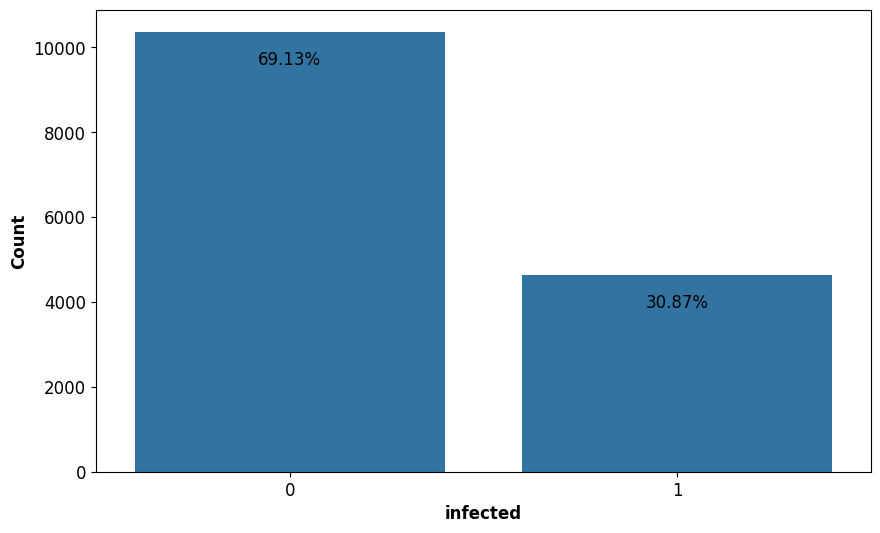

In [95]:
plt.figure(figsize=(10,6))
total = len(df['infected'])
count_entries=sns.countplot(x='infected',data=df)
plt.xlabel('infected',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
for p in count_entries.patches:
    count_entries.annotate('{:.2f}%'.format(100*p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()), 
                               ha = 'center', va = 'center', xytext = (0, -20), textcoords = 'offset points')

In [96]:
df['infected'].value_counts()

infected
0    10369
1     4631
Name: count, dtype: int64

##### the target has unbalanced classes

<Axes: >

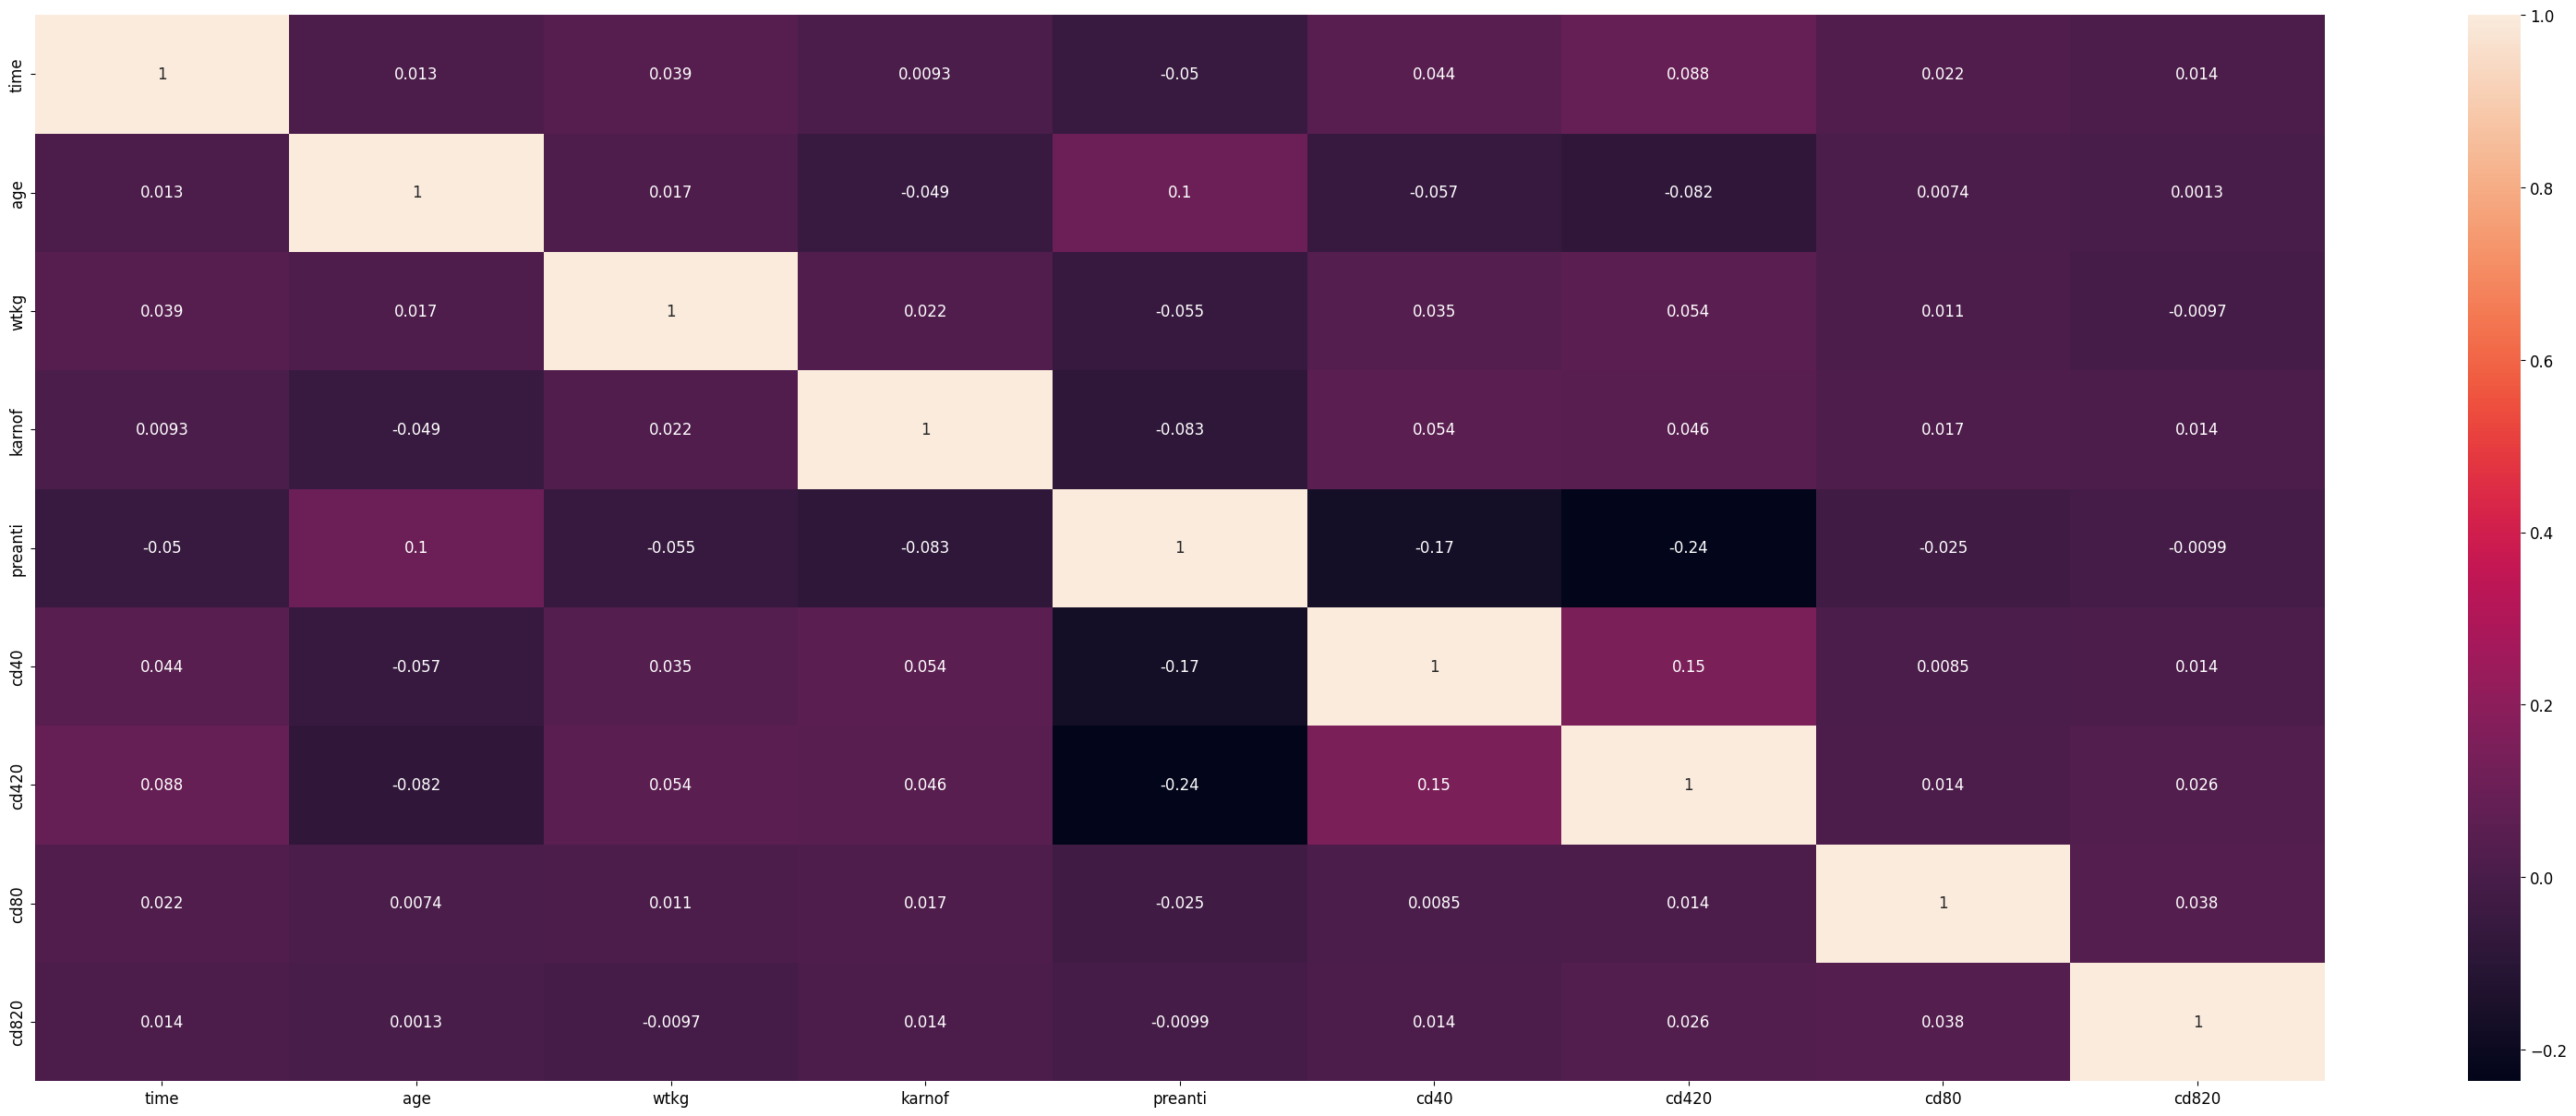

In [97]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(40,15))
sns.heatmap(numeric_df.corr(),annot=True)

##### there is less correlation between the most part of numeric features

In [98]:
# List of numerical variables to plot
variables = ['age', 'wtkg', 'karnof', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820']

# Plotting each variable
for variable in variables:
    fig = px.histogram(df, x=variable, title=f'Histogram of {variable}')
    fig.update_layout(
        xaxis_title='Value',
        yaxis_title='Frequency',
        bargap=0.1,
        showlegend=False,
    )
    fig.update_traces(marker=dict(line=dict(color='black', width=1)))
    fig.show()

Text(0.5, 1.0, "Correlations of the numerical variables to 'infected' feature")

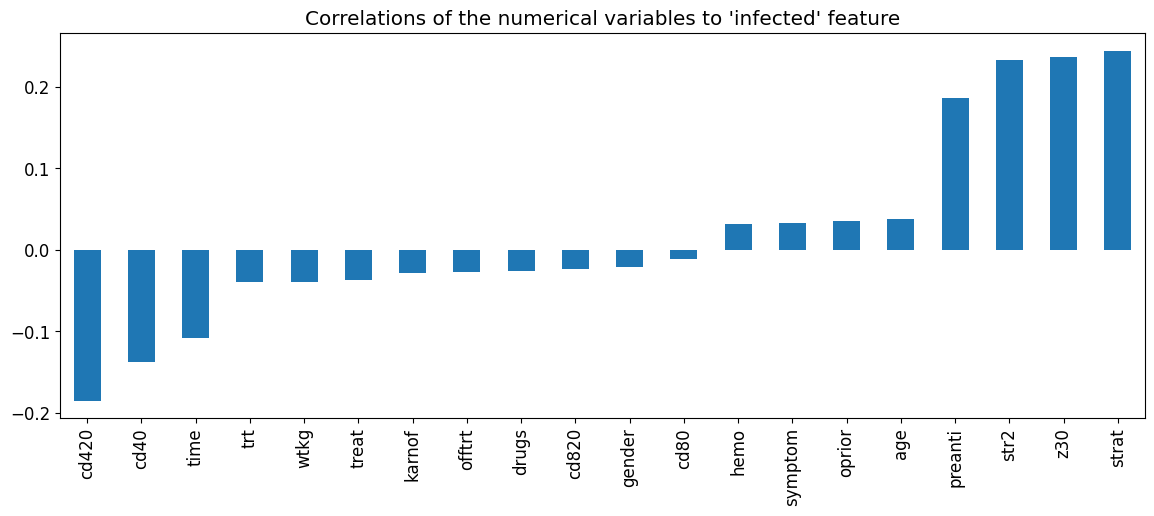

In [99]:
plt.figure(figsize=(14,5))
plt.rcParams['font.size']=12
df.corr()['infected'].sort_values().drop('infected').plot(kind='bar')
plt.title("Correlations of the numerical variables to 'infected' feature")

In [100]:
import pandas as pd
import plotly.express as px

# Assuming df is your dataframe with the appropriate variables and data

# List of variables to plot
variables = ['age', 'wtkg', 'karnof', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820']

# Dictionary of labels for each variable
labels_dict = {
    'age': 'Age',
    'wtkg': 'Weight (kg)',
    'karnof': 'Karnofsky Score',
    'preanti': 'Days Pre-175 Anti-retroviral Therapy',
    'cd40': 'CD4 at Baseline',
    'cd420': 'CD4 at 20+/-5 Weeks',
    'cd80': 'CD8 at Baseline',
    'cd820': 'CD8 at 20+/-5 Weeks'
}

# Plotting each variable
for variable in variables:
    fig = px.box(df, x='infected', y=variable, points="all", color='infected')
    
    # Layout
    fig.update_layout(
        xaxis_title='infected',
        yaxis_title=labels_dict[variable],  # Access label from dictionary
        title=f'Boxplot per la variabile {labels_dict[variable]} divisa per le classi di infected'
    )
    
    fig.show()



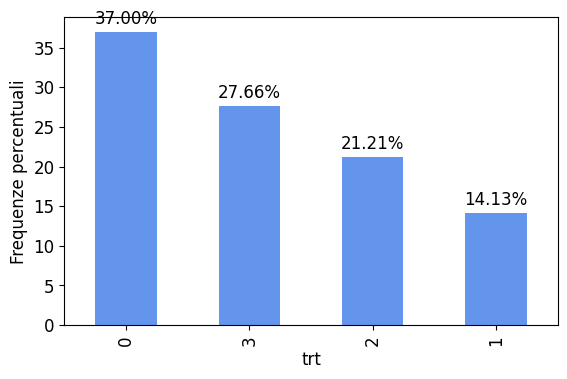

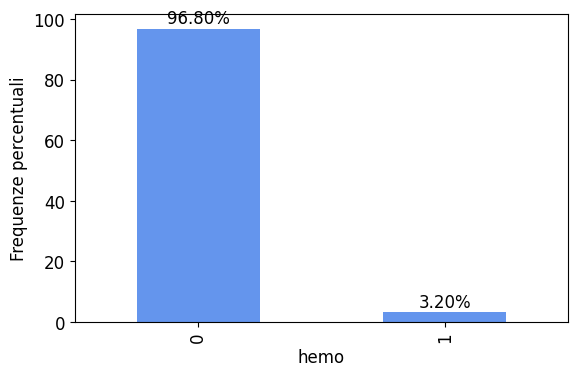

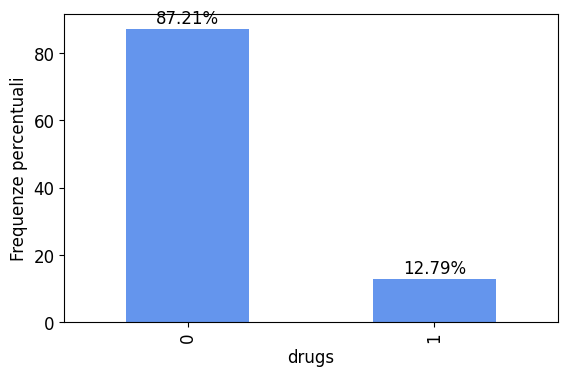

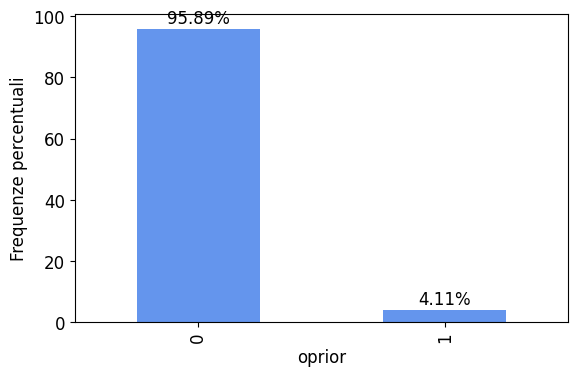

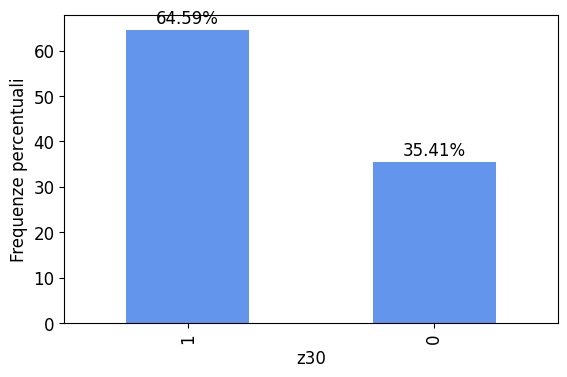

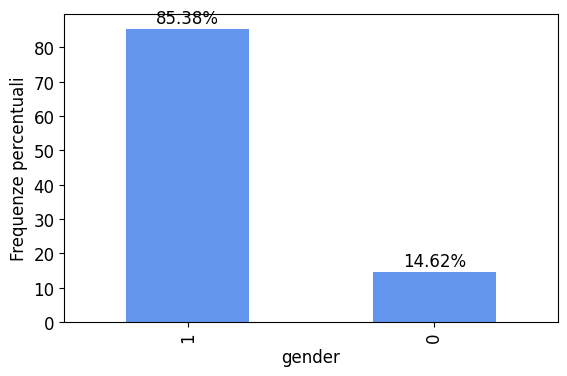

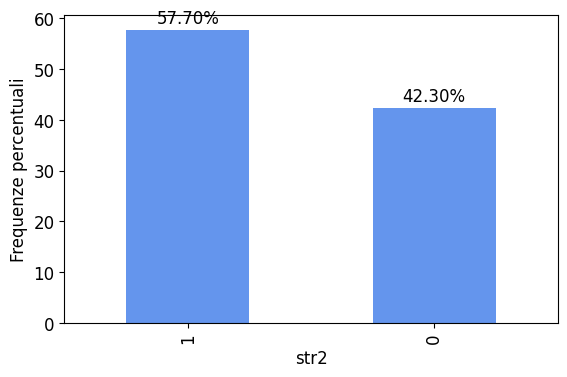

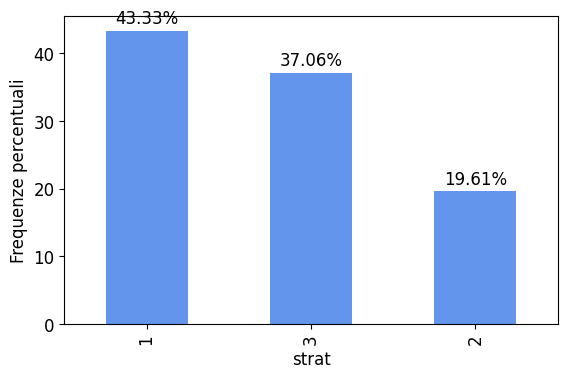

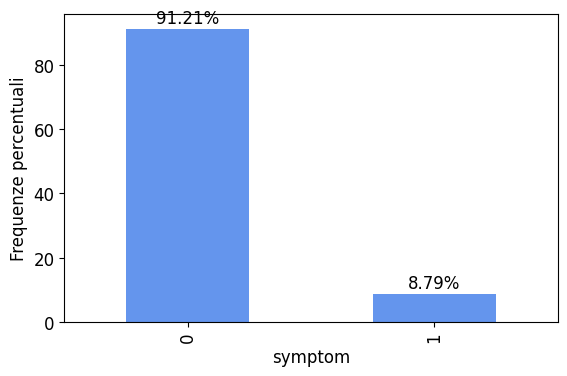

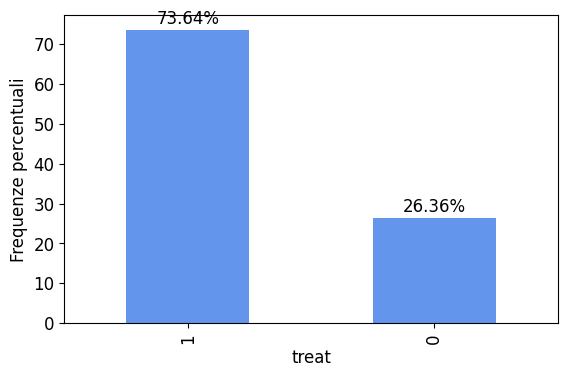

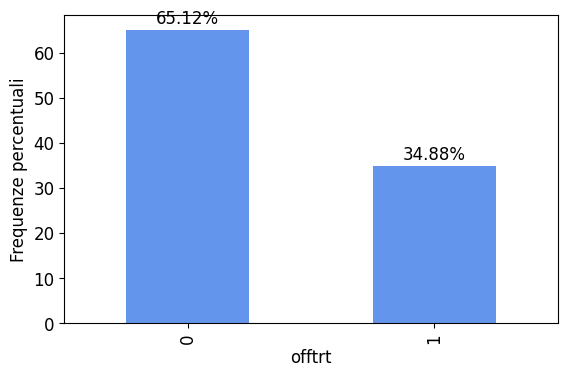

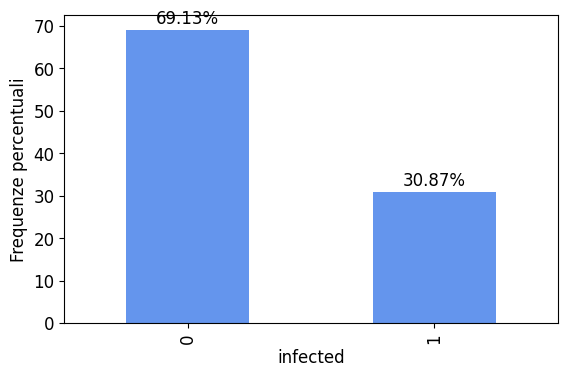

In [101]:
cat_var = df.select_dtypes(include=["object"])
for column in cat_var:
    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    
    relative_freq = df[column].value_counts(normalize=True)
    
    percent_freq = relative_freq * 100
    percent_freq.plot(kind="bar", color="CornflowerBlue")
    plt.xlabel(column)
    plt.ylabel("Frequenze percentuali")
    
    
    for i, v in enumerate(percent_freq):
        plt.text(i, v + 0.5, f'{v:.2f}%', ha='center', va='bottom')
plt.show()


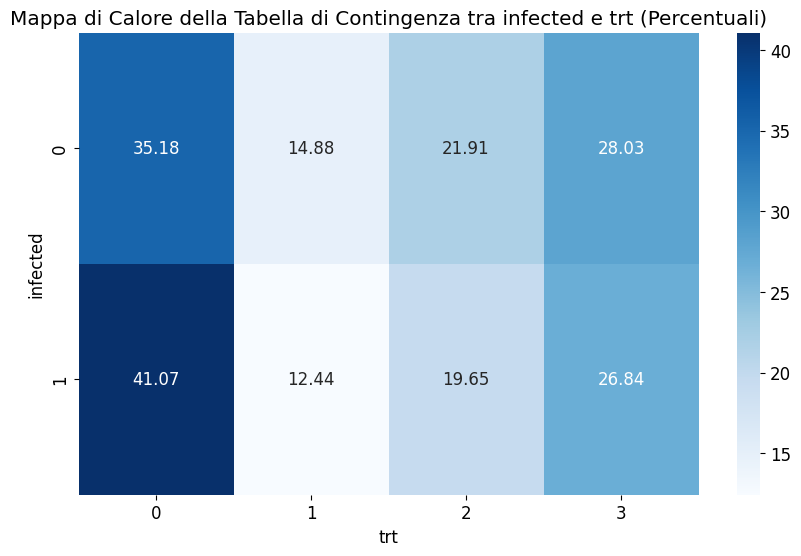

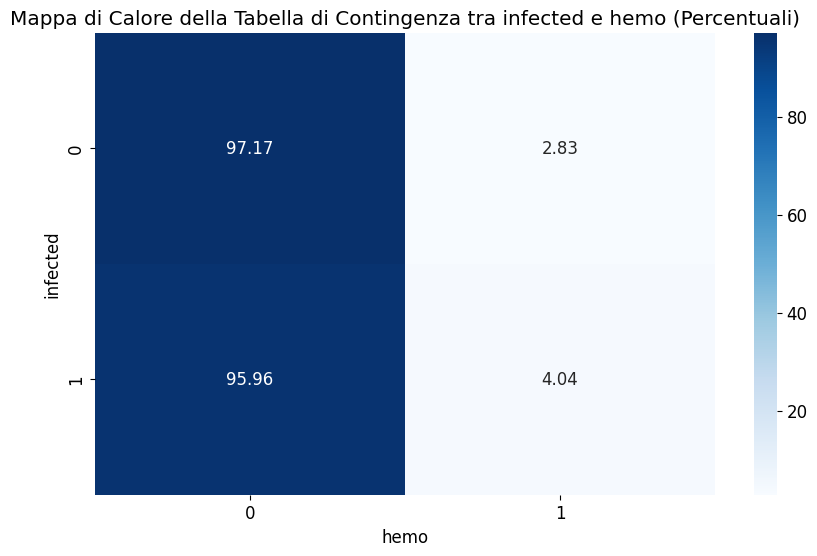

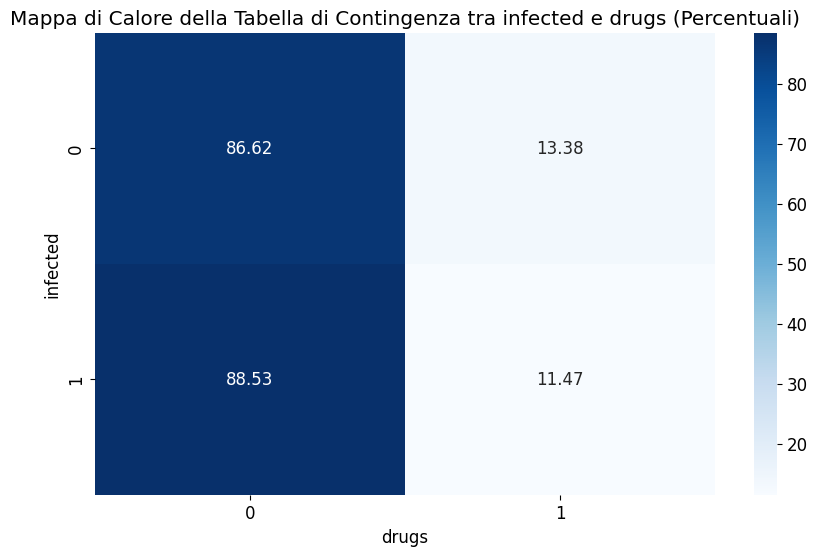

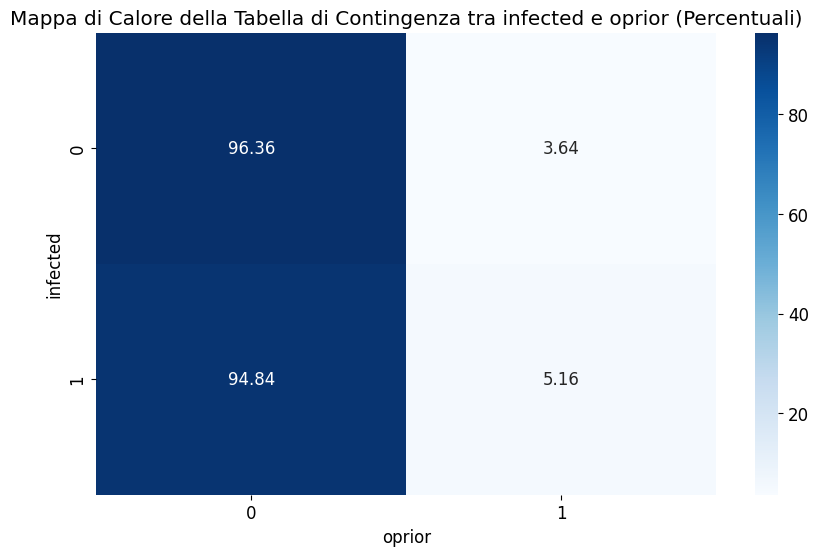

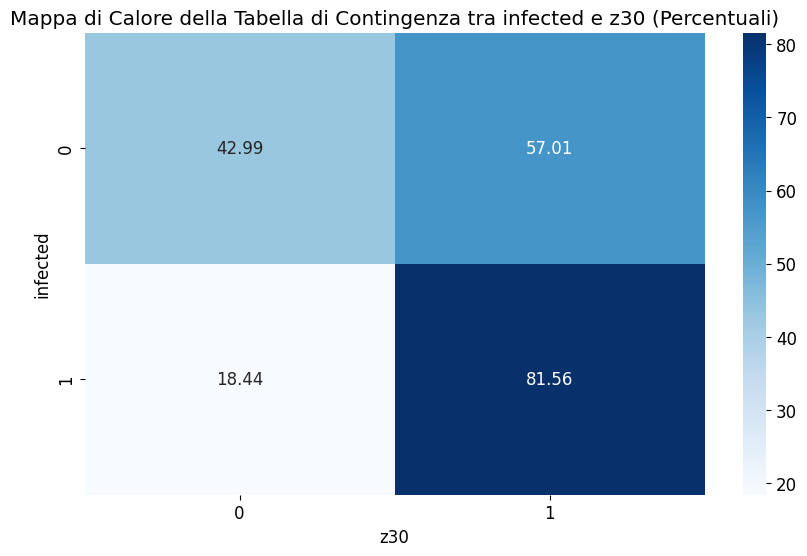

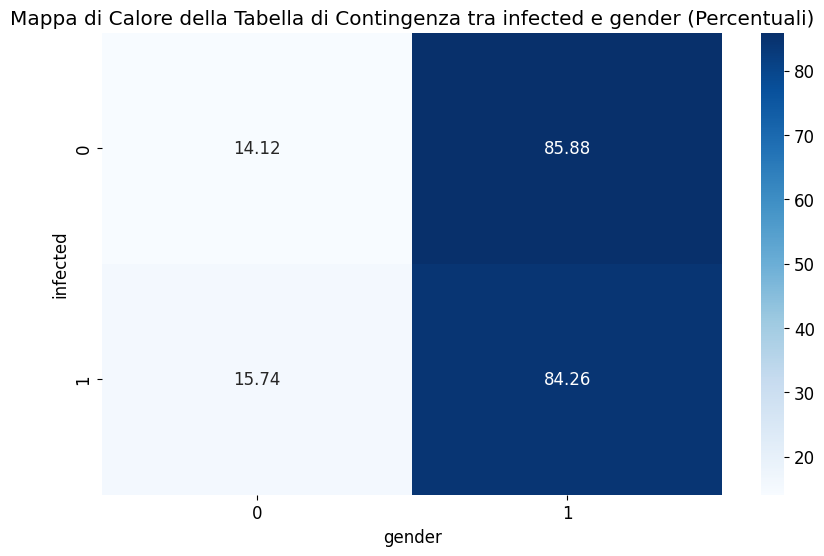

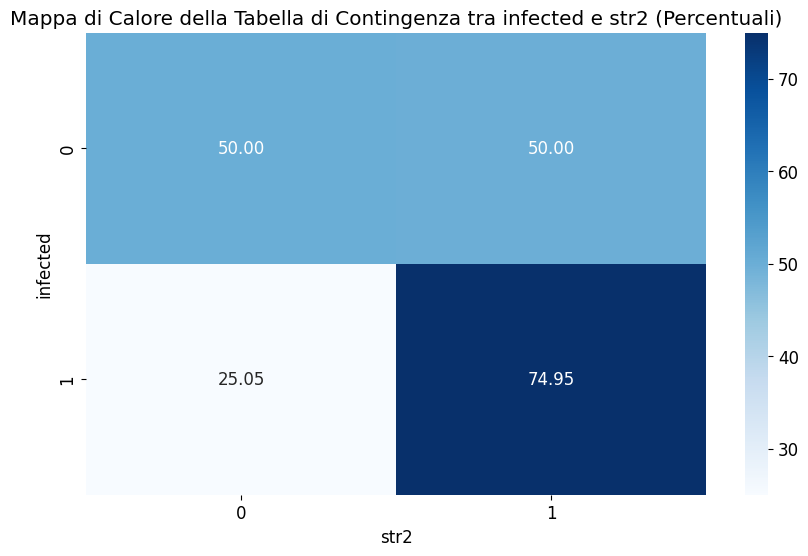

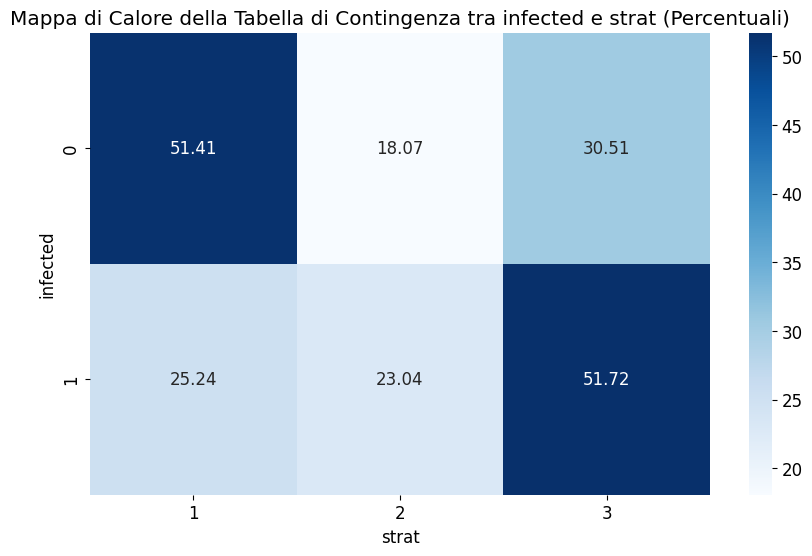

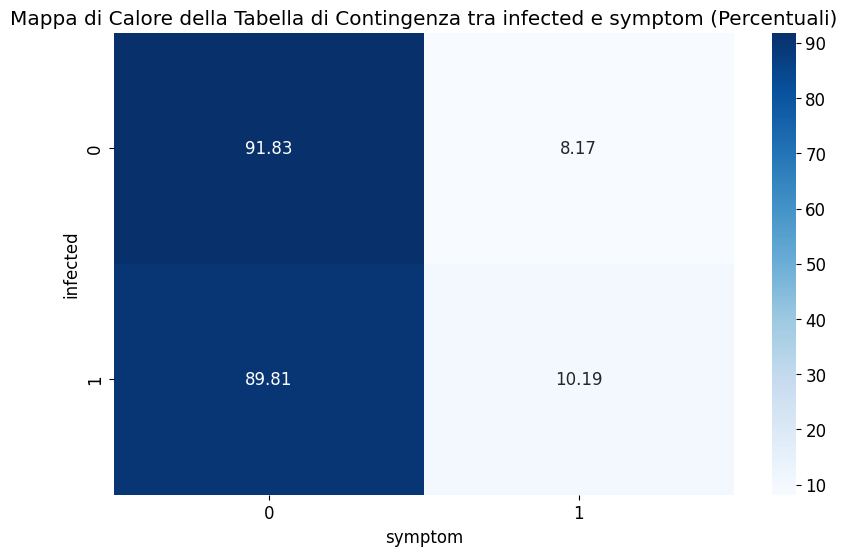

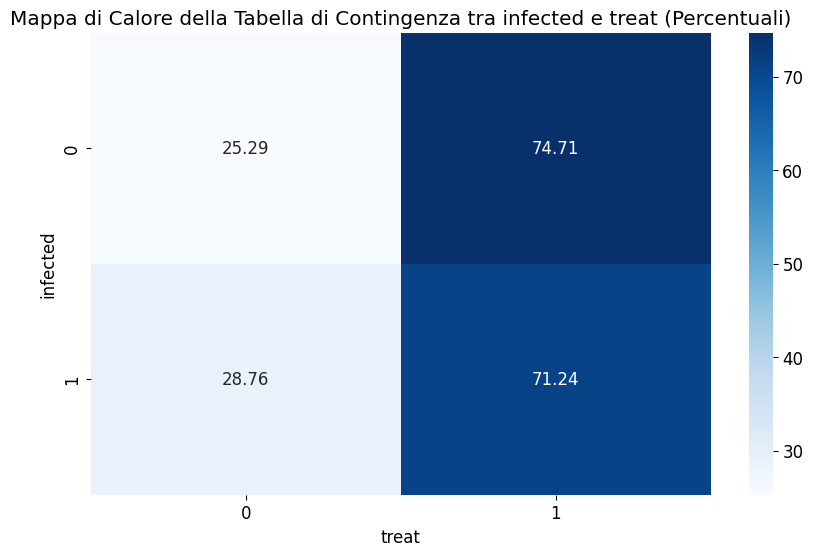

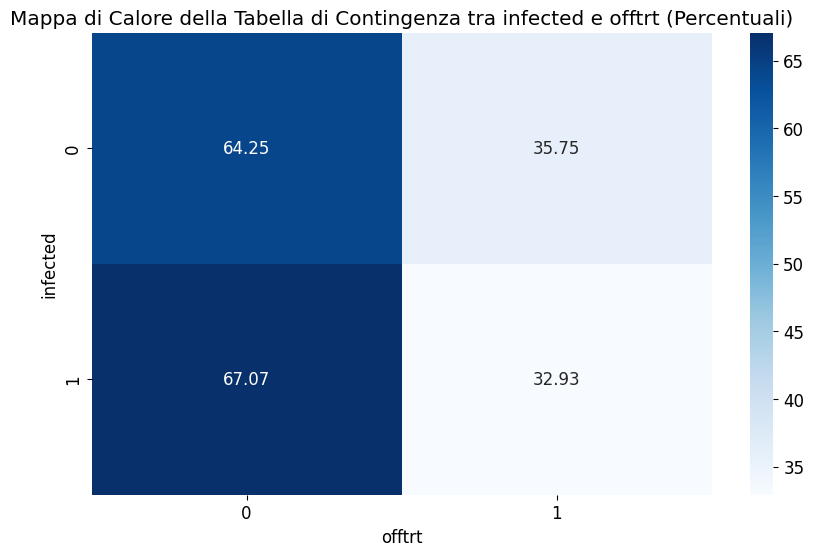

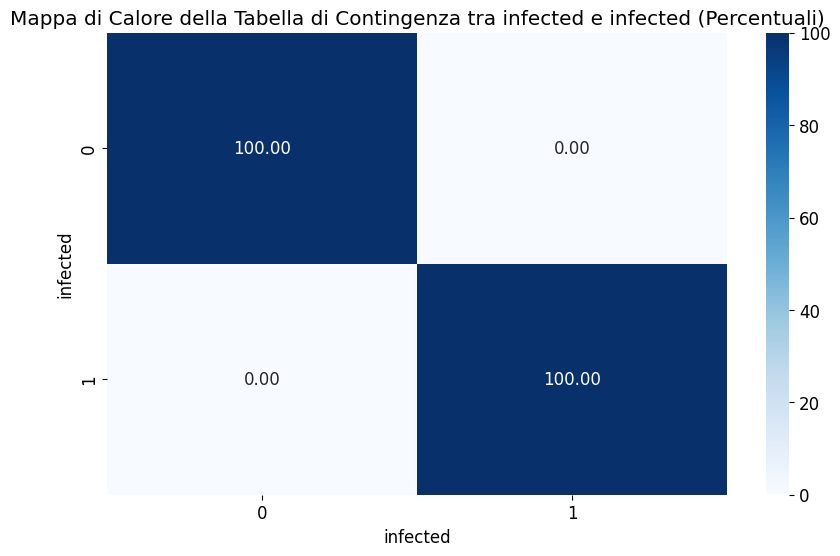

In [102]:
object_columns = df.select_dtypes(include=['object']).columns

# Creiamo una mappa di calore per ciascuna variabile object rispetto a 'infected'
for category in object_columns:
    # Calcola la tabella di contingenza
    contingency_table = pd.crosstab(df['infected'], df[category])
    
    # Calcola le percentuali rispetto al totale
    contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
    
    # Visualizza la mappa di calore
    plt.figure(figsize=(10, 6))
    sns.heatmap(contingency_table_percentage, annot=True, fmt='.2f', cmap='Blues')
    plt.title(f'Mappa di Calore della Tabella di Contingenza tra infected e {category} (Percentuali)')
    plt.xlabel(category)
    plt.ylabel('infected')
    plt.show()

#### The cleaned dataset

In [103]:
df[categorical_columns] = df[categorical_columns].astype('int64')

In [104]:
df.to_csv("aids_clean.csv", index=False)